In [5]:
%run setup.py

In [2]:
from astropy import constants as const
import astropy.units as u

def mass_function(period, asini):
    #return (4*np.pi**2) / (1*const.G) * ((asini)**3) / ((period).to(u.s)**2)
    si = (4*np.pi**2 * (1*const.c**3)) / (1*const.G) * 1 / (period.to(u.s)**2) * (asini**3)
    return si.to(u.M_sun)

In [3]:
K, P, a1 = np.loadtxt('../data/pb1_binaries.txt', usecols=(0, 1, 4), skiprows=1).T

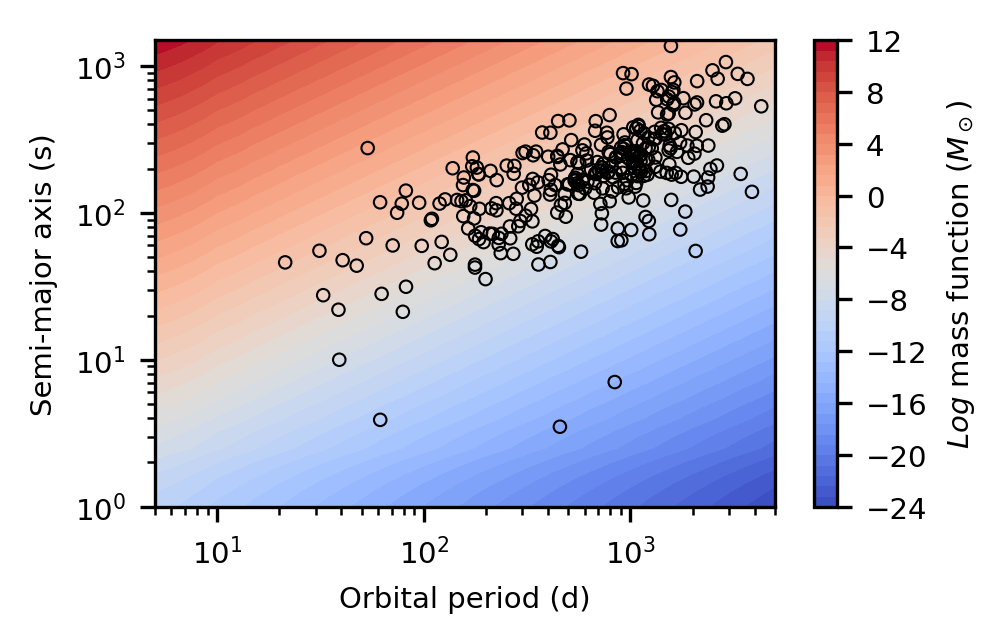

In [6]:
plt.figure(figsize=mnras_size(240, square=False))

asinis = np.linspace(1,1500,1000) * u.s
periods = np.linspace(5,5000,1000) * u.d
X, Y = np.meshgrid(periods, asinis)
mfs = mass_function(X, Y)

plt.contourf(X, Y, np.log(mfs.value), levels=50, cmap='coolwarm')
plt.colorbar(label=r'$Log$ mass function ($M_\odot$)')
#plt.scatter(840, 7.1, c='green')
plt.scatter(P, a1, marker='.', facecolors='none', edgecolors='black', alpha=1, linewidth=0.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Orbital period (d)')
plt.ylabel('Semi-major axis (s)')

poss = [(a1 < 10) & (P > 100)]

#plt.savefig(overleaf_path + 'known_binaries.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [7]:
mass_function(P[poss][0]*u.day, a1[poss][0]*u.s).to(u.M_sun)

/Users/danielhey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


<Quantity 2.21389579e-07 solMass>

In [8]:
a1[poss]

/Users/danielhey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([3.5 , 7.05])

In [92]:
K[poss]

/Users/danielhey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([4386091., 7917485.])